# Chp 01 Cleaning Data in Python

## Course Description
A vital component of data science involves acquiring raw data and getting it into a form ready for analysis. It is commonly said that data scientists spend 80% of their time cleaning and manipulating data, and only 20% of their time actually analyzing it. This course will equip you with all the skills you need to clean your data in Python, from learning how to diagnose problems in your data, to dealing with missing values and outliers. At the end of the course, you'll apply all of the techniques you've learned to a case study to clean a real-world `Gapminder` dataset.

## 1-1 Exploring your data

Say you've just gotten your hands on a brand new dataset and are itching to start exploring it. But where do you begin, and how can you be sure your dataset is clean? This chapter will introduce you to data cleaning in Python. You'll learn how to explore your data with an eye for diagnosing issues such as **outliers, missing values, and duplicate rows**.

## Diagnose data for cleanin

## Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the [**NYC Open Data portal**](https://opendata.cityofnewyork.us/). This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, `df_subset`, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

**Instructions**

- Import pandas as `pd`.
- Read `'dob_job_application_filings_subset.csv'` into a DataFrame called `df`.
- Print the head and tail of `df`.
- Print the shape of df and its columns. Note: `.shape` and `.columns` are attributes, not methods, so you don't need to follow these with parentheses ().
- Hit 'Submit Answer' to view the results! Notice the suspicious number of 0 values. Perhaps these represent missing data.

In [6]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('datasets/dob_job_application_filings_subset.csv', low_memory=False)



In [10]:
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

In [9]:
print(df.tail())

           Job #  Doc #        Borough       House #  \
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12841  NOEL STREET                        5382   20  5069722       A2   
12842  10 AVENUE                          1059    4  1082503       A2   
12843  MANHATTAN AVE.                     1848   31  1055849       A2   
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status           ...                         Owner's Last Name  \
12841          D           ...            MALITO                           
12842          D           ...            CROMAN                        

In [7]:
df.shape


(12846, 82)

In [8]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

Great work! In addition to the suspicious number of `0` values, which may represent missing data, notice that the columns that contain monetary values - `'Initial Cost'` and `'Total Est. Fee'` - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values. You will check this in the next exercise.

## Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful `.info()` method.

The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the `'Initial Cost'` and `'Total Est. Fee'` columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame `df` and the subset DataFrame `df_subset` have been pre-loaded. Your task is to use the `.info()` method on these and analyze the results.

**Instructions**
- Print the info of `df`.
- Print the info of the subset dataframe, `df_subset`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [11]:
columns_subset = ['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']

df_subset = df[columns_subset]

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB


In [12]:
df_subset.head()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


Excellent! Notice that the columns `'Initial Cost'` and `'Total Est. Fee'` are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of `0` values. Given the amount of data that is missing in the full dataset, it's highly likely that these `0` values represent missing data.

## 1-2 Exploratory data analysis


## Calculating summary statistics
You'll now use the `.describe()` method to calculate summary statistics of your data.

In this exercise, an adapted DataFrame has been prepared for you to inspect, with fewer columns to increase readability in the IPython Shell.

This adapted DataFrame has been pre-loaded as `df2`. Your job is to use the `.describe()` method on it in the IPython Shell and select the statement below that is **False**.

In [13]:
df2 = df[['Street Frontage', 'Existing Height', 'Proposed Height']]
df2.describe()

,Street Frontage,Existing Height,Proposed Height
count,12846.000000,12846.000000,12846.000000
mean,3.069360,94.022809,94.917562
std,37.246034,146.917360,146.580666
min,0.000000,0.000000,0.000000
25%,0.000000,20.000000,21.000000
50%,0.000000,45.000000,45.000000
75%,0.000000,105.000000,107.000000
max,3160.000000,4200.000000,4200.000000


**Possible Answers**
- [ ] The mean of 'Existing Height' is 94.022809.
- [ ] There are 12846 entries in the DataFrame.
- [x] The standard deviation of 'Street Frontage' is 11.874080.
- [ ] The maximum of 'Proposed Height' is 4200.

Well done! The standard deviation of `'Street Frontage'` is actually `37.246034`.

## Frequency counts for categorical data
As you've seen, `.describe()` can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna`which is `True` by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the `dropna` column to `False` so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

- Print the value counts for:
    - The `'Borough'` column.
    - The `'State'` column.
    - The `'Site Fill'` column.

In [18]:
# Print the value counts for 'Borough'
# Use square bracket [] method to select a single column
df['Borough'].value_counts(dropna=False)

# df.Borough.value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [19]:
# Use .dot method to select a single column
df.Borough.value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [15]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))


NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
GA        6
MA        6
VA        5
CO        4
SC        3
AZ        3
MN        3
WI        3
NC        2
UT        2
RI        2
VT        1
NM        1
IN        1
MI        1
WA        1
Name: State, dtype: int64


In [16]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


Fantastic work! Notice how not all values in the `'State'` column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the `'Site Fill'` column, you may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.

## 1-3 Visual exploratory data analysis


## Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is `'Existing Zoning Sqft'`.

The `.plot()` method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - `kind='hist'`, for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a `log` scale. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

**Instructions**
- Import `matplotlib.pyplot` as `plt`.
- Create a histogram of the `'Existing Zoning Sqft'` column. - - Rotate the axis labels by `70` degrees and use a `log` scale for both axes.
Display the histogram using `plt.show()`.


count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


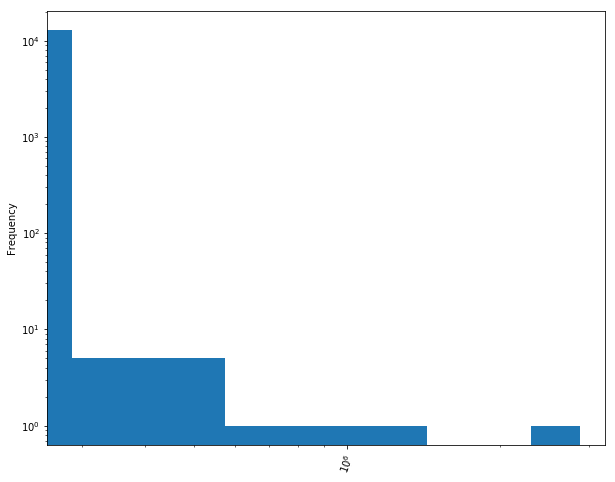

In [21]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

Excellent work! While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

TypeError: unsupported operand type(s) for /: 'str' and 'int'

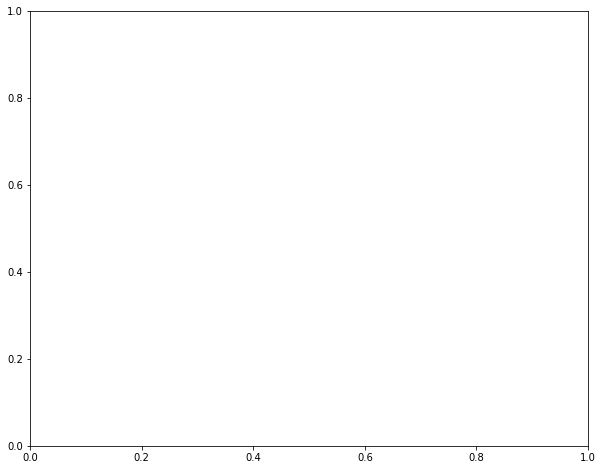

In [28]:
# Create the boxplot

df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

In [27]:
df.columns



Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  